In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("C:\\Users\\Mubasshira\\Downloads\\states.csv")
print(f"Shape of data {data.shape}")
data.head()

Shape of data (52, 14)


,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016)
0,Alabama,14.60%,10.10%,-4.50%,215000,2545000,165534,152206,$310,False,799176.0,910775,111599.0,989855
1,Alaska,19.90%,14.90%,-5%,36000,390000,17995,16205,$750,True,122334.0,166625,44291.0,88966
2,Arizona,16.90%,10.80%,-6.10%,410000,3288000,179445,124346,$230,True,1201770.0,1716198,514428.0,1175624
3,Arkansas,17.50%,9.50%,-8%,234000,1365000,63357,56843,$306,True,556851.0,920194,363343.0,606146
4,California,18.50%,8.60%,-9.90%,3826000,19552000,1415428,1239893,$309,True,7755381.0,11843081,4087700.0,5829777


In [3]:
data.columns

Index(['State', 'Uninsured Rate (2010)', 'Uninsured Rate (2015)',
       'Uninsured Rate Change (2010-2015)',
       'Health Insurance Coverage Change (2010-2015)',
       'Employer Health Insurance Coverage (2015)',
       'Marketplace Health Insurance Coverage (2016)',
       'Marketplace Tax Credits (2016)', 'Average Monthly Tax Credit (2016)',
       'State Medicaid Expansion (2016)', 'Medicaid Enrollment (2013)',
       'Medicaid Enrollment (2016)', 'Medicaid Enrollment Change (2013-2016)',
       'Medicare Enrollment (2016)'],
      dtype='object')

In [4]:
data.isnull().sum()

State                                           0
Uninsured Rate (2010)                           0
Uninsured Rate (2015)                           0
Uninsured Rate Change (2010-2015)               0
Health Insurance Coverage Change (2010-2015)    0
Employer Health Insurance Coverage (2015)       0
Marketplace Health Insurance Coverage (2016)    0
Marketplace Tax Credits (2016)                  0
Average Monthly Tax Credit (2016)               0
State Medicaid Expansion (2016)                 1
Medicaid Enrollment (2013)                      2
Medicaid Enrollment (2016)                      0
Medicaid Enrollment Change (2013-2016)          2
Medicare Enrollment (2016)                      0
dtype: int64

In [5]:
state_medicaid_expansion_null_row = data[data['State Medicaid Expansion (2016)'].isnull()]
state_medicaid_expansion_null_row

,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016)
51,United States,15.50%,9.40%,6.10%,19304000,172292000,11081330,9389609,$291,NaN,56392477.0,73532931,16106157.0,57149984


**It seems like we have a row in our dataset where the value in the "State" column is "United States." This row might represent an aggregation or summary of data for the entire United States, rather than a specific state. Since the "United States" is not a state but the country as a whole, it would not have a state-level Medicaid expansion status.
Let's Exclude United State row from our data before being further inappropriately analysed**

In [6]:
data = data[data['State'] != 'United States']

In [7]:
Medicaid_Enrollment_2013_null_rows = data[data['Medicaid Enrollment (2013)'].isnull()]
Medicaid_Enrollment_2013_null_rows

,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016)
6,Connecticut,9.10%,6%,-3.10%,110000,2148000,102917,80759,$357,True,NaN,761137,NaN,644136
19,Maine,10.10%,8.40%,-1.70%,22000,702000,75240,63896,$342,False,NaN,273160,NaN,315160


**Let's Keep these Null values as it is because there might be a possibility of no Medicaid Enrollment for the 2 States**

In [8]:
data['Uninsured Rate (2010)'] = data['Uninsured Rate (2010)'].str.replace("%", '')
data['Uninsured Rate (2015)'] = data['Uninsured Rate (2015)'].str.replace("%", '')
data['Uninsured Rate Change (2010-2015)'] = data['Uninsured Rate Change (2010-2015)'].str.replace("%", '')
data['Average Monthly Tax Credit (2016)'] = data['Average Monthly Tax Credit (2016)'].str.replace("$", '')
data['Uninsured Rate (2010)'] = data['Uninsured Rate (2010)'].astype(float)
data['Uninsured Rate (2015)'] = data['Uninsured Rate (2015)'].astype(float)
data['Uninsured Rate Change (2010-2015)'] = data['Uninsured Rate Change (2010-2015)'].astype(float)

In [9]:
data.head()

,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016)
0,Alabama,14.6,10.1,-4.5,215000,2545000,165534,152206,310,False,799176.0,910775,111599.0,989855
1,Alaska,19.9,14.9,-5.0,36000,390000,17995,16205,750,True,122334.0,166625,44291.0,88966
2,Arizona,16.9,10.8,-6.1,410000,3288000,179445,124346,230,True,1201770.0,1716198,514428.0,1175624
3,Arkansas,17.5,9.5,-8.0,234000,1365000,63357,56843,306,True,556851.0,920194,363343.0,606146
4,California,18.5,8.6,-9.9,3826000,19552000,1415428,1239893,309,True,7755381.0,11843081,4087700.0,5829777


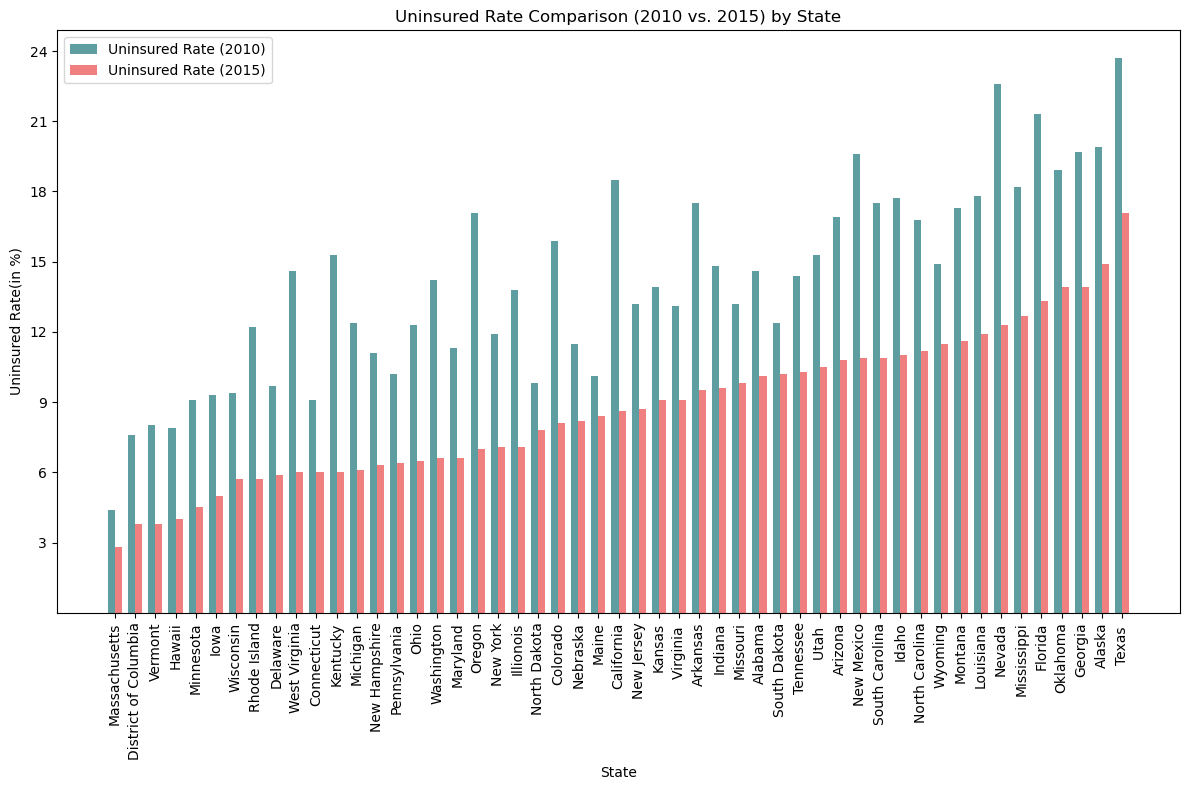

In [10]:
data_sorted = data.sort_values(by='Uninsured Rate (2015)')
states = data_sorted['State']
uninsured_rate_2010 = data_sorted['Uninsured Rate (2010)']
uninsured_rate_2015 = data_sorted['Uninsured Rate (2015)']
bar_width = 0.35
index = np.arange(len(states))
plt.figure(figsize=(12, 8))

plt.bar(index, uninsured_rate_2010, width=bar_width, label='Uninsured Rate (2010)', color='cadetblue')
plt.bar(index + bar_width, uninsured_rate_2015, width=bar_width, label='Uninsured Rate (2015)', color='lightcoral')
desired_ticks = np.arange(3, max(max(uninsured_rate_2010), max(uninsured_rate_2015)) + 1, 3)
plt.yticks(desired_ticks)

# Customizing
plt.xlabel('State')
plt.ylabel('Uninsured Rate(in %)')
plt.title('Uninsured Rate Comparison (2010 vs. 2015) by State')
plt.xticks(index + bar_width / 2, states, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

**The data from the graph reveals that Texas exhibited the highest uninsured rate in 2010, amounting to 23.70%. However, there was a notable decrease in the uninsured rate by 2015, where it declined to 17.10%, for more detailed numbers see below dataframe**

In [11]:
Uninsured_rates = data[['State','Uninsured Rate (2010)','Uninsured Rate (2015)' ]]
Uninsured_rates_sorted = Uninsured_rates.sort_values(by='Uninsured Rate (2015)', ascending=False)
Uninsured_rates_sorted.head()

,State,Uninsured Rate (2010),Uninsured Rate (2015)
43,Texas,23.7,17.1
1,Alaska,19.9,14.9
36,Oklahoma,18.9,13.9
10,Georgia,19.7,13.9
9,Florida,21.3,13.3


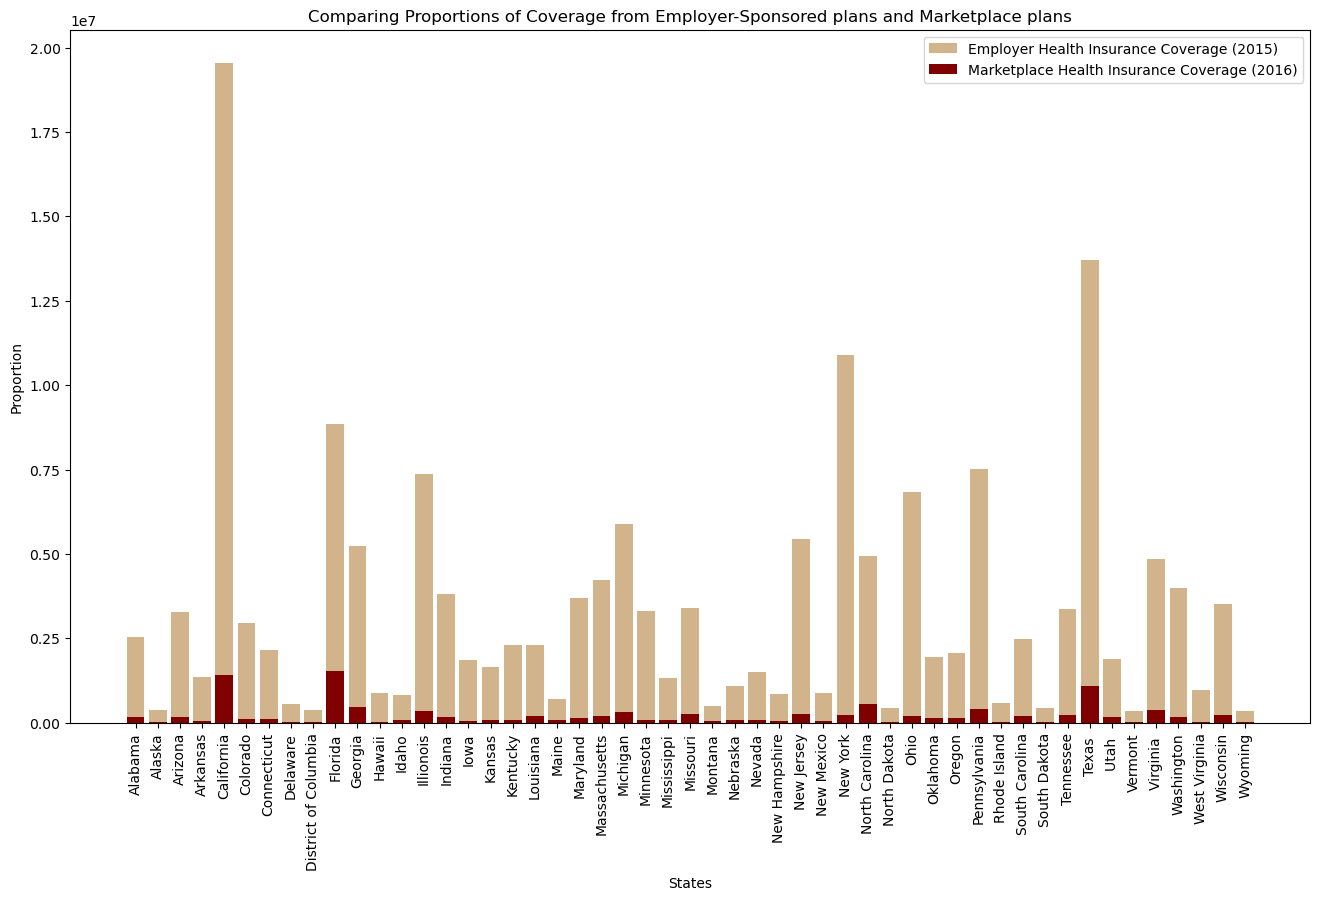

In [12]:
#Let's create a stacked bar chart to compare the proportions of coverage from employer-sponsored plans, 
#marketplace plans, and other sources in 2015 and 2016.

plt.figure(figsize=(16,9))
plt.bar(data['State'], data['Employer Health Insurance Coverage (2015)'], label='Employer Health Insurance Coverage (2015)',
       color = "tan")
plt.bar(data['State'], data['Marketplace Health Insurance Coverage (2016)'], label='Marketplace Health Insurance Coverage (2016)',
       color = 'maroon')
plt.title('Comparing Proportions of Coverage from Employer-Sponsored plans and Marketplace plans')
plt.xlabel("States")
plt.ylabel("Proportion")
plt.xticks(rotation=90)
plt.legend()
plt.show()

- States with Dominant Employer Coverage: In states where the upper part of the bar (Employer Health Insurance Coverage) is much larger than the lower part (Marketplace Health Insurance Coverage), it indicates that employer-sponsored plans are the dominant source of health coverage.
--------------------------------------------------------------------------------------------------------------------------------
- States with Significant Marketplace Coverage: In states where the lower part of the bar (Marketplace Health Insurance Coverage) is noticeable, it suggests a significant proportion of the population opted for marketplace plans in 2016.
--------------------------------------------------------------------------------------------------------------------------------
Based on the stacked graph above, it appears that there could be the emergence of marketplace coverage in 2016 for states such as CA, FL, and TX. While not substantial, there seems to be a modest increase.

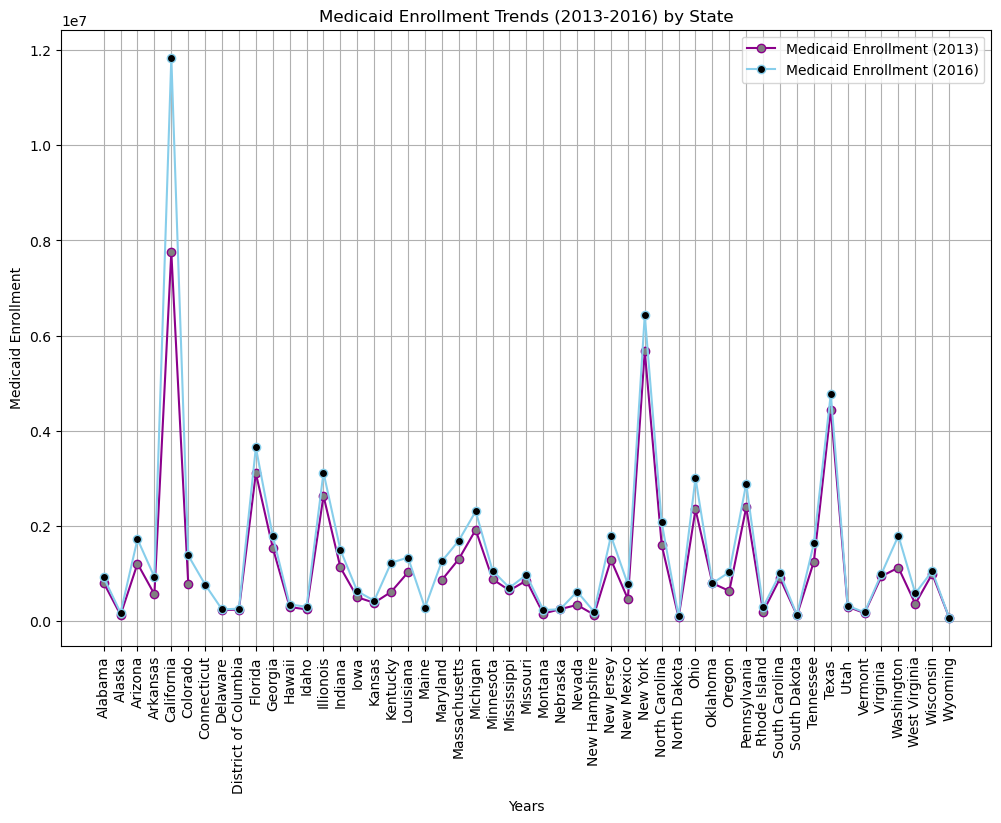

In [14]:
#Let's assess whether Medicaid enrollments have increased or decreased.
plt.figure(figsize=(12, 8))
plt.plot(data['State'], data['Medicaid Enrollment (2013)'], marker='o', color = 'darkmagenta',mfc = 'gray',
         label='Medicaid Enrollment (2013)')
plt.plot(data['State'], data['Medicaid Enrollment (2016)'], marker='o', color = 'skyblue', mfc = 'black',
        label='Medicaid Enrollment (2016)')

plt.title('Medicaid Enrollment Trends (2013-2016) by State')
plt.xlabel('Years')
plt.ylabel('Medicaid Enrollment')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()


**In 2016, the state with the highest Medicaid enrollment was California, reaching a total of 11,843,081. Similarly, in 2013, California also led with the highest enrollment, recording 7,755,381.**

The Marketplace Tax Credit is a subsidy aimed at reducing monthly premium costs for eligible individuals and families purchasing health insurance through the Health Insurance Marketplace. It helps make health insurance more affordable by considering income and household size.

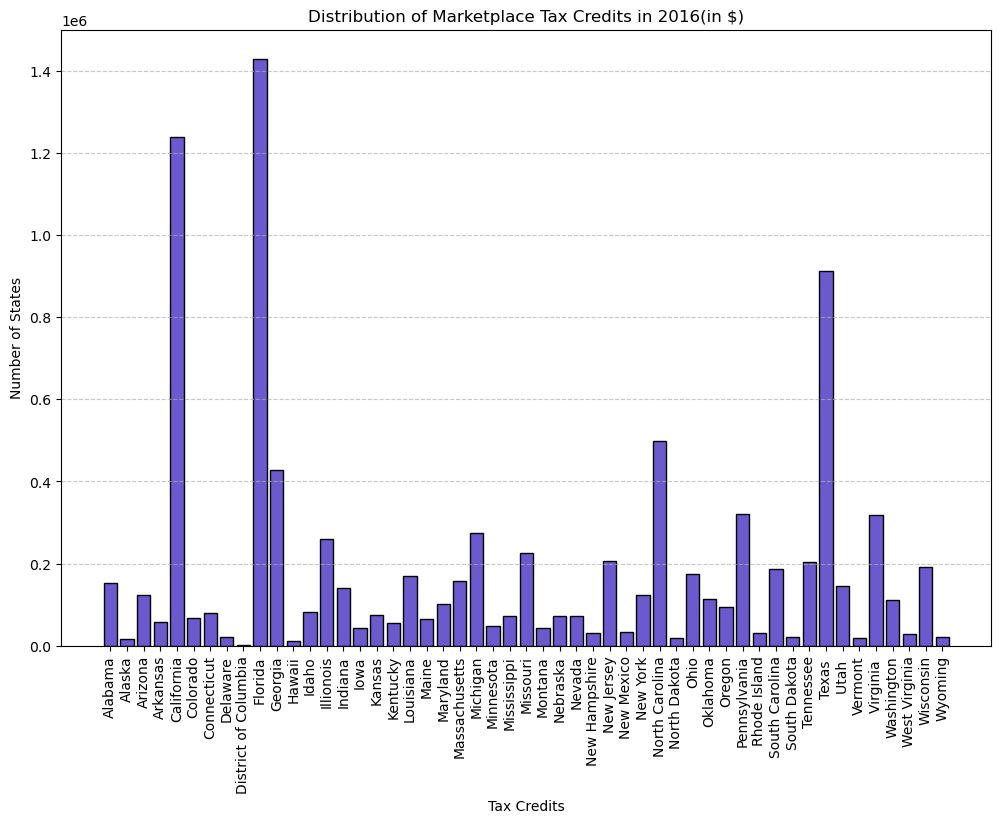

In [15]:
tax_credits = data['Marketplace Tax Credits (2016)']
plt.figure(figsize=(12, 8))
plt.bar(data['State'],tax_credits,color='slateblue', edgecolor='black')
plt.title('Distribution of Marketplace Tax Credits in 2016(in $)')
plt.xlabel('Tax Credits')
plt.ylabel('Number of States')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90)

plt.show()

- Florida received the highest tax credit, totaling 1,428,712, followed by California with 1,239,893, and Texas with 913,177.(in $)

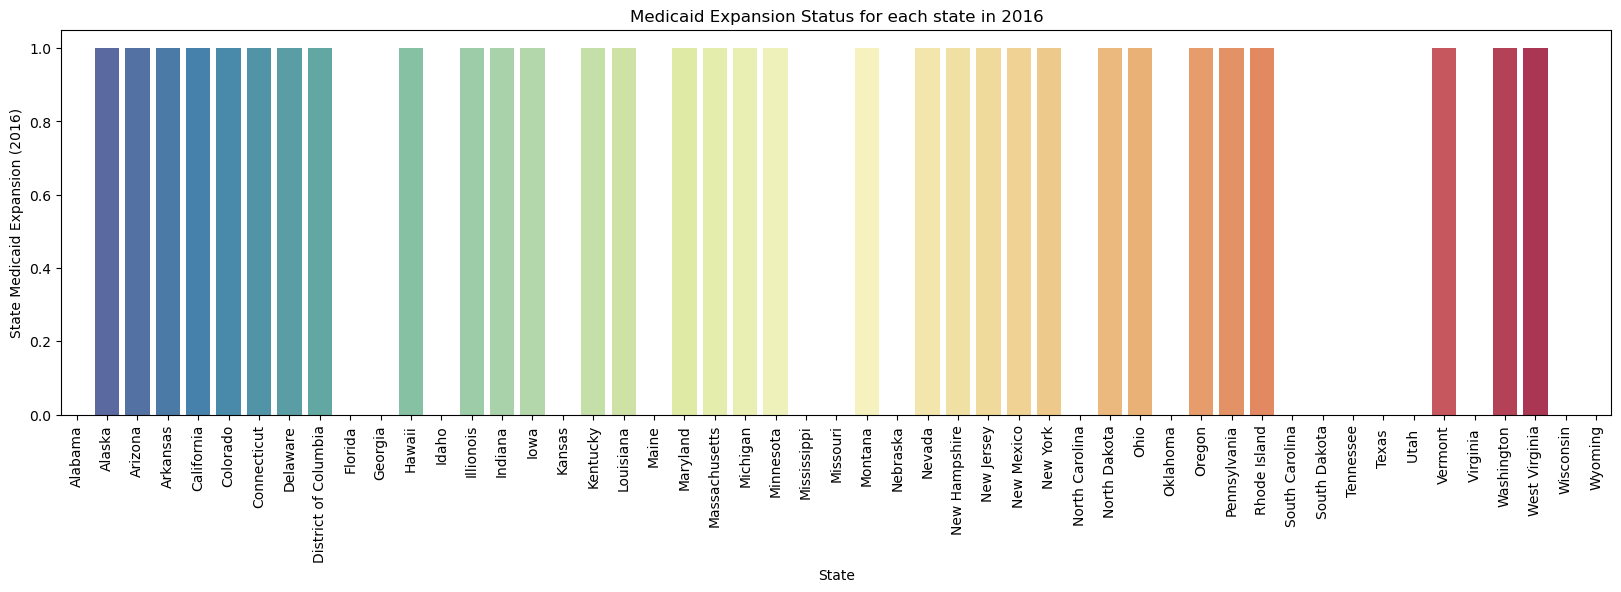

In [17]:
plt.figure(figsize=(20,5))
sns.barplot(x=data['State'], y=data['State Medicaid Expansion (2016)'],palette='Spectral_r')
plt.title('Medicaid Expansion Status for each state in 2016')
plt.xticks(rotation=90)
plt.show()

**Bars represent states that expanded Medicaid in 2016, while the absence of bars indicates no expansion. Specifically, Alabama, Florida, Georgia, Idaho, Kansas, Maine, Mississippi, Missouri, Nebraska, North Carolina, Oklahoma, South Carolina, South Dakota, Tennessee, Texas, Utah, Virginia, Wisconsin and Wyoming did not expand Medicaid.**

# How has the Affordable Care Act changed the rate of citizens with health insurance coverage?

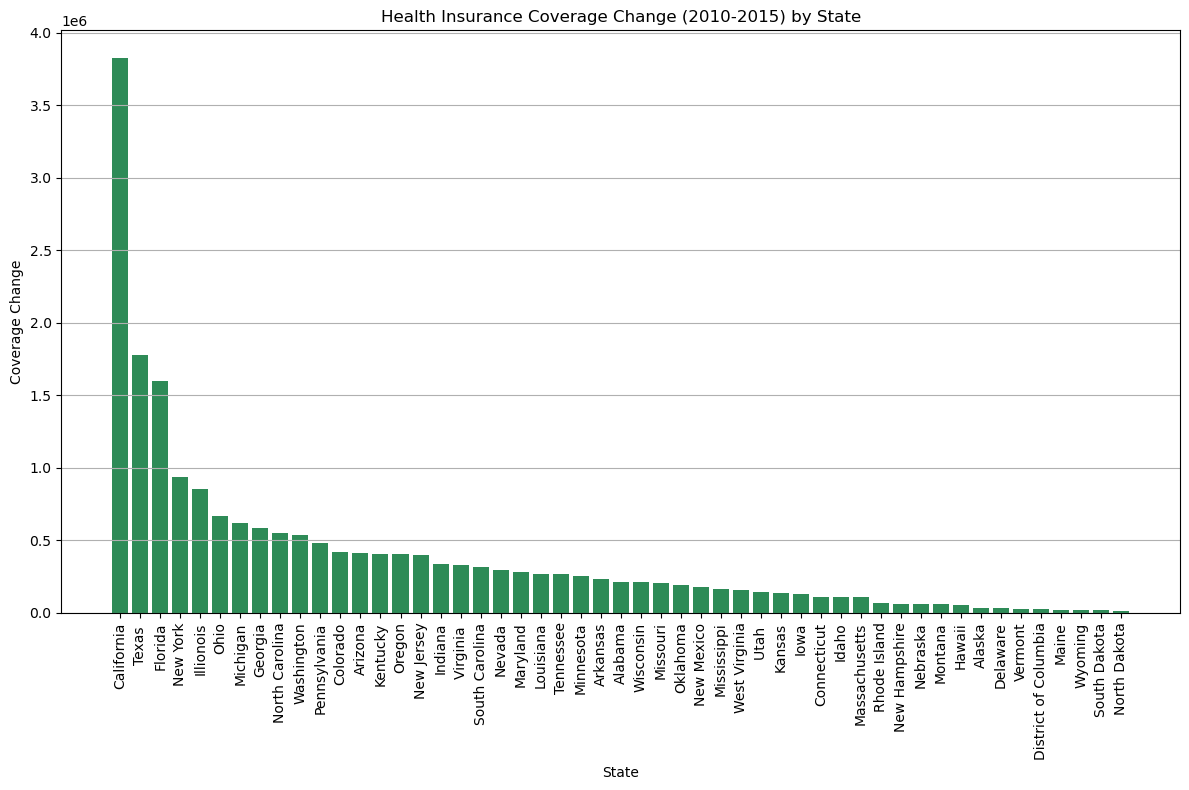

In [19]:
plt.figure(figsize=(12, 8))
HIC_state = data[['State','Health Insurance Coverage Change (2010-2015)']]
HIC = HIC_state.sort_values(by='Health Insurance Coverage Change (2010-2015)', ascending=False)
plt.bar(HIC['State'], HIC['Health Insurance Coverage Change (2010-2015)'], color='seagreen')
plt.title('Health Insurance Coverage Change (2010-2015) by State')
plt.xlabel('State')
plt.ylabel('Coverage Change')
plt.xticks(rotation=90)  
plt.grid(axis='y') 
plt.tight_layout()
plt.show()

**The influence of policies and initiatives like the Affordable Care Act on enhancing health insurance accessibility is particularly evident in states such as California, Texas, Florida and NewYork.**

# Which states observed the greatest decline in their uninsured rate?

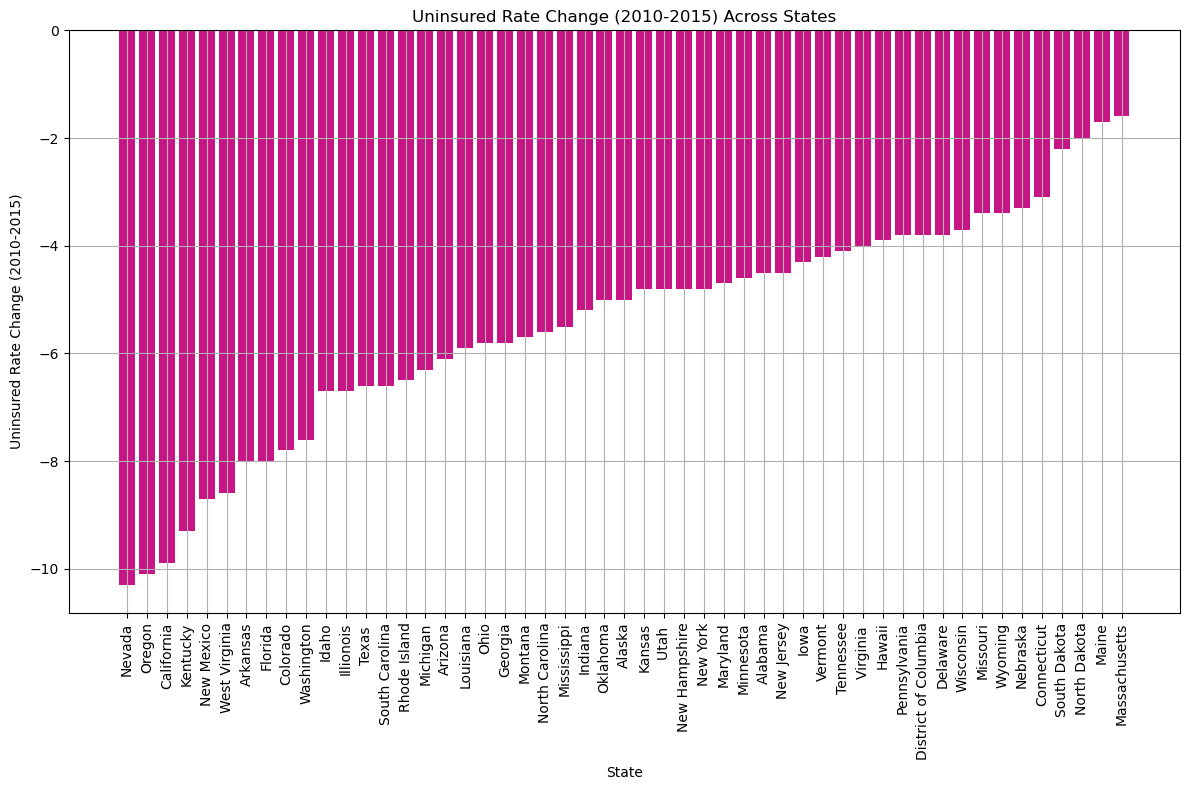

In [23]:
sorted_data = data.sort_values(by='Uninsured Rate Change (2010-2015)')
plt.figure(figsize=(12, 8))
plt.bar(sorted_data['State'], sorted_data['Uninsured Rate Change (2010-2015)'], color='mediumvioletred')

plt.xlabel('State')
plt.ylabel('Uninsured Rate Change (2010-2015)')
plt.title('Uninsured Rate Change (2010-2015) Across States')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.grid(True)
plt.show()

*The states with the greatest decline in their uninsured rates from 2010 to 2015 are:*

- Nevada: -10.3
- Oregon: -10.1
- California: -9.9
- Kentucky: -9.3
- New Mexico: -8.7

All the change values are negative, it means that the uninsured rate decreased in all states from 2010 to 2015. In the context of health insurance coverage, a decrease in the uninsured rate indicates an improvement, meaning that more individuals gained health insurance coverage during this period.

So, if all the change values are negative:

- It indicates a reduction in the percentage of individuals without health insurance coverage.
- This could be due to various factors such as the implementation of the Affordable Care Act (ACA), expansion of Medicaid, establishment of health insurance marketplaces, or other policy changes aimed at increasing access to healthcare coverage.

# Did those states expand Medicaid program coverage and/or implement a health insurance marketplace?

- Among the top five states where uninsured rates decreased the most (NV, OR, CA, KY, NM), all have Medicaid expansion.
- Additionally, California ranks among the top three states with the highest marketplace health insurance coverage. While other states also have marketplace coverage, their enrollment numbers are not as high as California's. 


*Please refer to the graph below for the states and their marketplace enrollment numbers.*

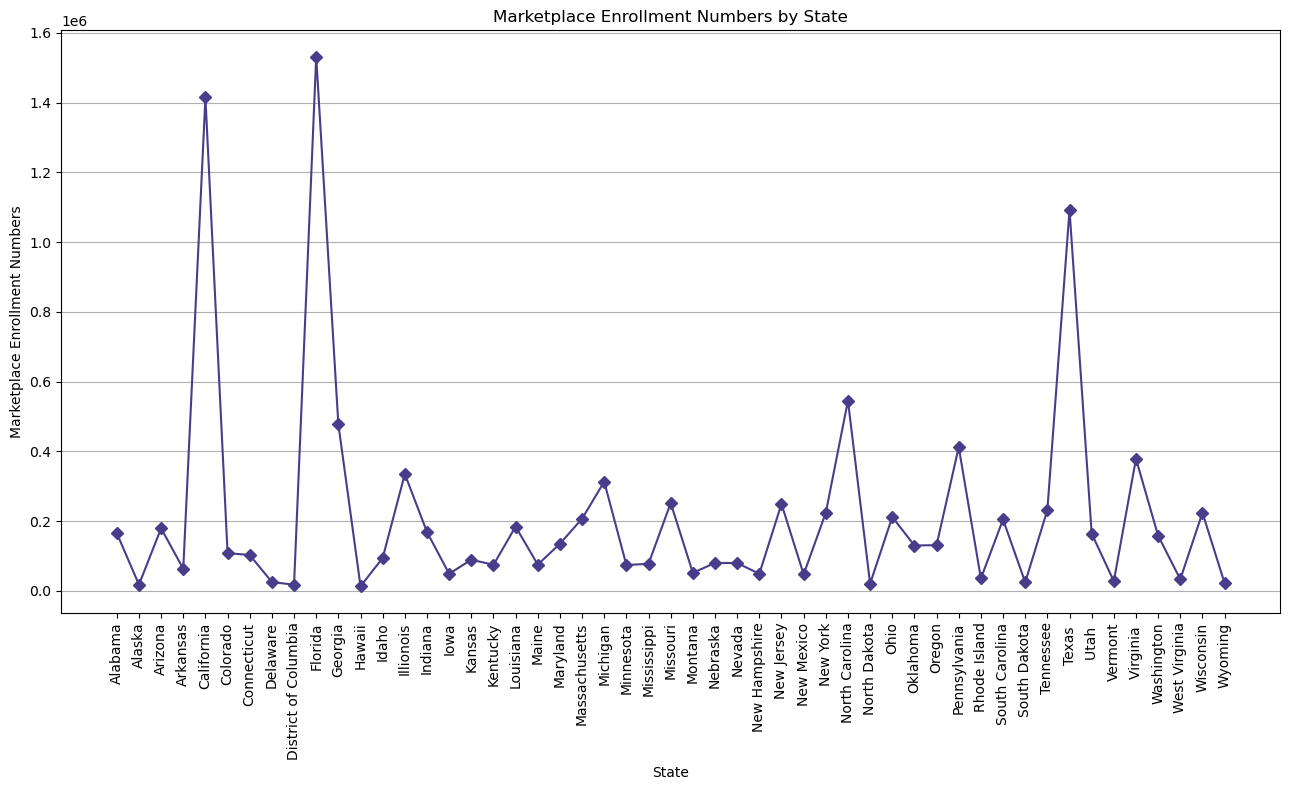

In [25]:
plt.figure(figsize=(13, 8))
plt.plot(data['State'], data['Marketplace Health Insurance Coverage (2016)'], color='darkslateblue', marker='D', linestyle='-')
plt.title('Marketplace Enrollment Numbers by State')
plt.xlabel('State')
plt.ylabel('Marketplace Enrollment Numbers')
plt.xticks(rotation=90)
plt.grid(axis='y')  # Show gridlines on the y-axis
plt.tight_layout()
plt.show()


# What do you predict will happen to the nationwide uninsured rate in the next five years?

Below are listed few points for prediction of uninsured rate in the next five years

- i) Impact of Medicaid Expansion: States that expanded Medicaid coverage under the Affordable Care Act generally saw larger decreases in uninsured rates compared to states that did not expand Medicaid. This suggests that Medicaid expansion has been effective in increasing coverage and reducing the uninsured rate.

In [13]:
states_with_medicaid_expansion = [
    "California", "Pennsylvania", "Michigan", "Illinois", "New Jersey",
    "Ohio", "Louisiana", "Massachusetts", "Indiana", "Arizona", "New York",
    "Washington", "Maryland", "Oregon", "Connecticut", "Nevada", "Colorado",
    "Arkansas", "Kentucky", "Minnesota", "Montana", "Iowa", "New Mexico",
    "New Hampshire", "Rhode Island", "West Virginia", "Delaware", "Vermont",
    "North Dakota", "Alaska", "Hawaii", "District of Columbia"
]

states_without_medicaid_expansion = [
    'Alabama', 'Florida', 'Georgia', 'Idaho', 'Kansas', 
    'Maine', 'Mississippi', 'Missouri', 'Nebraska', 'North Carolina', 
    'Oklahoma', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 
    'Utah', 'Virginia', 'Wisconsin', 'Wyoming'
]

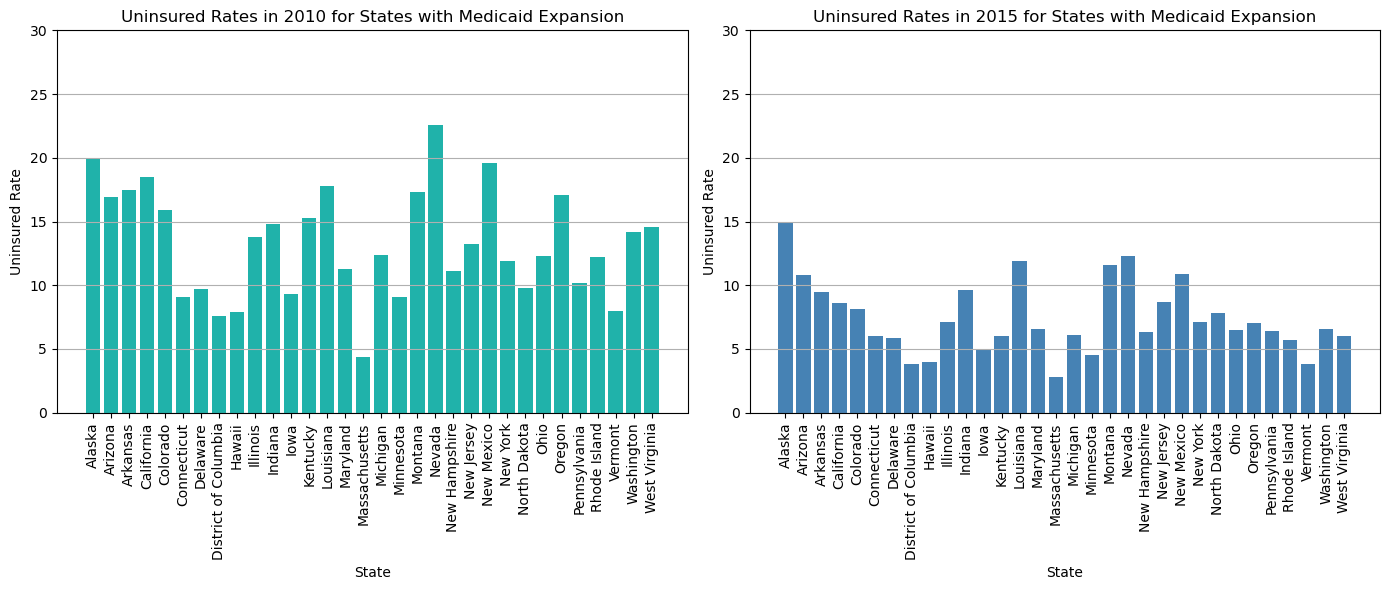

In [16]:
medicaid_expansion_data = data[data['State'].isin(states_with_medicaid_expansion)]
plt.figure(figsize=(14, 6))

# Subplot 1: Uninsured rates in 2010
plt.subplot(1, 2, 1)
plt.bar(medicaid_expansion_data['State'], medicaid_expansion_data['Uninsured Rate (2010)'], color='lightseagreen')
plt.title('Uninsured Rates in 2010 for States with Medicaid Expansion')
plt.xlabel('State')
plt.ylabel('Uninsured Rate')
plt.xticks(rotation=90)
plt.ylim(0, 30)  
plt.grid(axis='y')

# Subplot 2: Uninsured rates in 2015
plt.subplot(1, 2, 2)
plt.bar(medicaid_expansion_data['State'], medicaid_expansion_data['Uninsured Rate (2015)'], color='steelblue')
plt.title('Uninsured Rates in 2015 for States with Medicaid Expansion')
plt.xlabel('State')
plt.ylabel('Uninsured Rate')
plt.xticks(rotation=90)
plt.ylim(0, 30) 
plt.grid(axis='y')

plt.tight_layout()
plt.show()

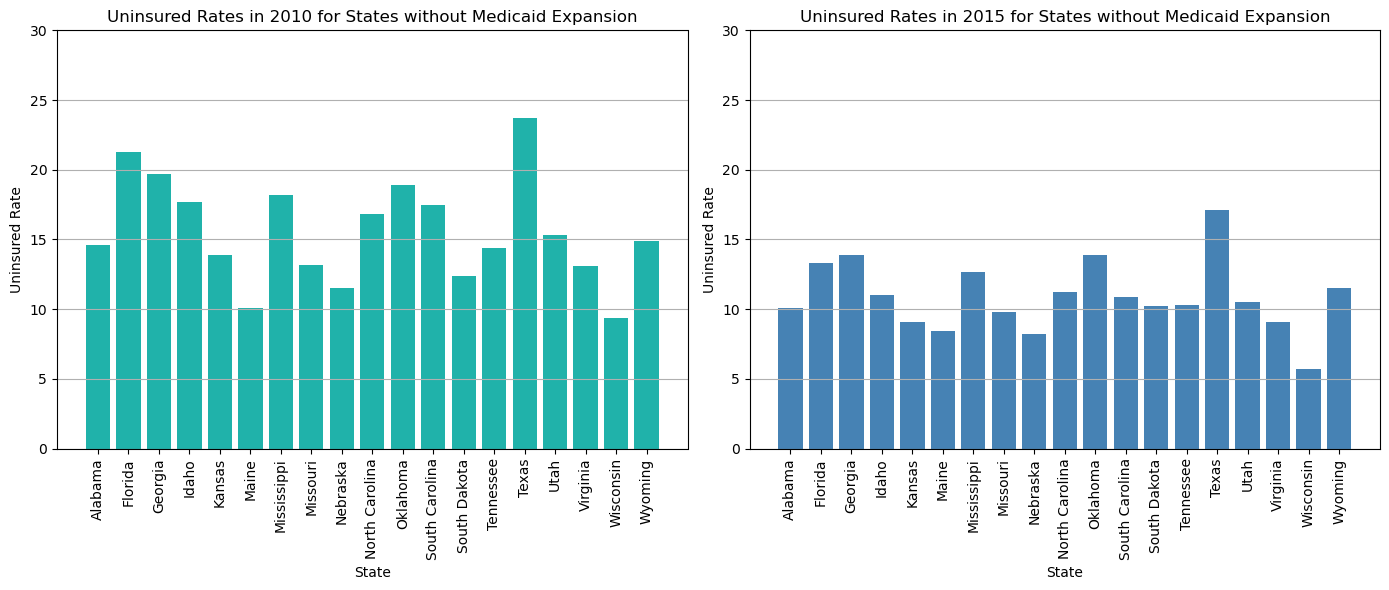

In [17]:
medicaid_expansion_data1 = data[data['State'].isin(states_without_medicaid_expansion)]
plt.figure(figsize=(14, 6))

# Subplot 1: Uninsured rates in 2010
plt.subplot(1, 2, 1)
plt.bar(medicaid_expansion_data1['State'], medicaid_expansion_data1['Uninsured Rate (2010)'], color='lightseagreen')
plt.title('Uninsured Rates in 2010 for States without Medicaid Expansion')
plt.xlabel('State')
plt.ylabel('Uninsured Rate')
plt.xticks(rotation=90)
plt.ylim(0, 30)  
plt.grid(axis='y')

# Subplot 2: Uninsured rates in 2015
plt.subplot(1, 2, 2)
plt.bar(medicaid_expansion_data1['State'], medicaid_expansion_data1['Uninsured Rate (2015)'], color='steelblue')
plt.title('Uninsured Rates in 2015 for States without Medicaid Expansion')
plt.xlabel('State')
plt.ylabel('Uninsured Rate')
plt.xticks(rotation=90)
plt.ylim(0, 30) 
plt.grid(axis='y')

plt.tight_layout()
plt.show()

- ii) Marketplace Health Insurance Coverage: States with higher marketplace health insurance coverage tended to have lower uninsured rates. This indicates that the availability of marketplace plans has helped individuals obtain health insurance coverage, contributing to the overall decrease in the uninsured rate.

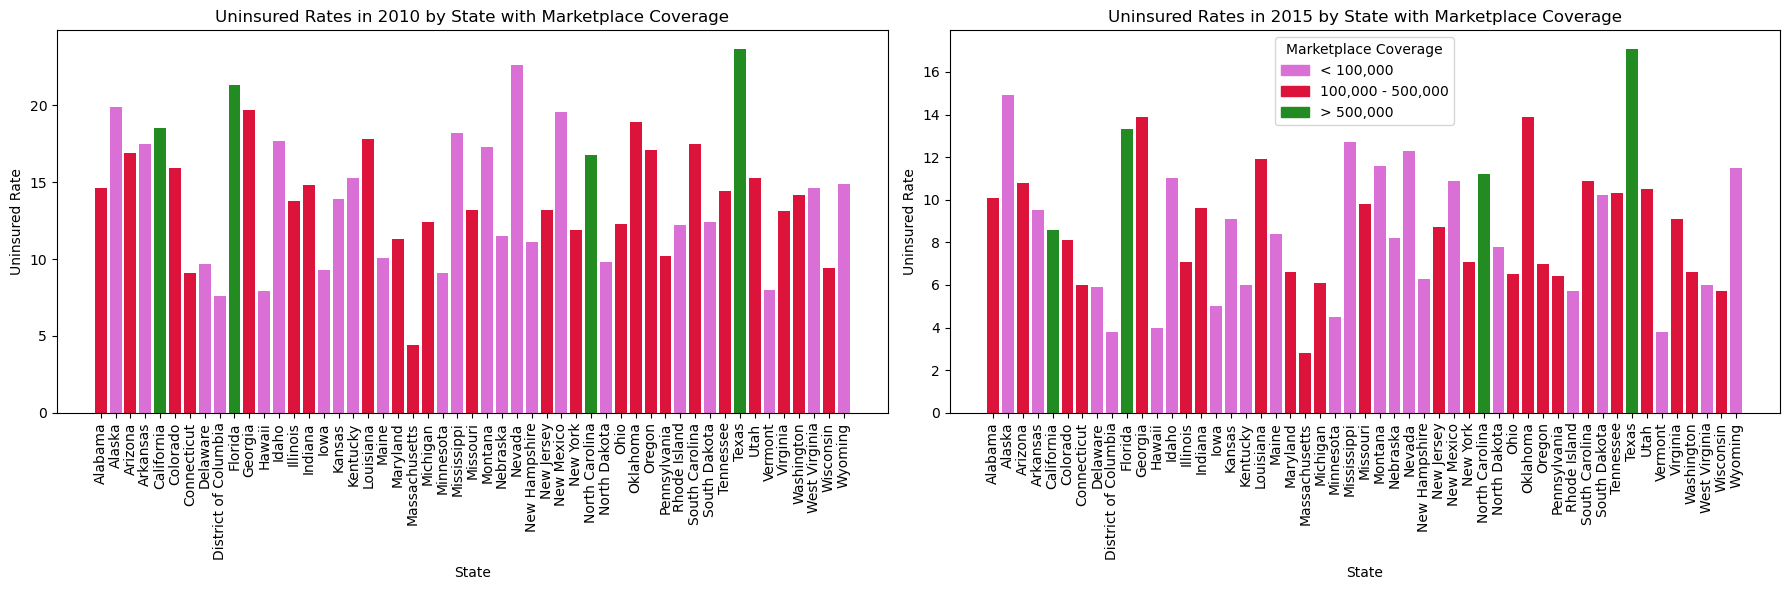

In [35]:
from matplotlib.patches import Patch
colors = np.where(np.array(data['Marketplace Health Insurance Coverage (2016)']) < 100000, 'orchid', 
          np.where(np.array(data['Marketplace Health Insurance Coverage (2016)']) < 500000, 'crimson', 'forestgreen'))
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.bar(data['State'], data['Uninsured Rate (2010)'], color=colors)
plt.title('Uninsured Rates in 2010 by State with Marketplace Coverage')
plt.xlabel('State')
plt.ylabel('Uninsured Rate')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
plt.bar(data['State'], data['Uninsured Rate (2015)'], color=colors)
plt.title('Uninsured Rates in 2015 by State with Marketplace Coverage')
plt.xlabel('State')
plt.ylabel('Uninsured Rate')
plt.xticks(rotation=90)

legend_labels = ['< 100,000', '100,000 - 500,000', '> 500,000']
legend_colors = ['orchid', 'crimson', 'forestgreen']
legend_patches = [Patch(color=color, label=label) for color, label in zip(legend_colors, legend_labels)]
plt.legend(handles=legend_patches, title='Marketplace Coverage')

plt.tight_layout()
plt.show()

*Texas, Florida, and North Carolina initially exhibited the highest uninsured rates in 2010. However, these rates decreased significantly with the implementation of marketplace coverage.*

- iii) State Policy Differences: States vary in their healthcare policies, including Medicaid expansion and the establishment of health insurance marketplaces. States that have implemented these policies have generally seen greater improvements in healthcare coverage compared to states that have not.

- iv) Economic Factors: Economic conditions, including employment levels and income levels, also influence healthcare coverage. Improvements in the economy may lead to more individuals gaining access to employer-sponsored health insurance, contributing to a further decrease in the uninsured rate.

- v) Future Predictions: Based on these trends, it is reasonable to predict that the nationwide uninsured rate will continue to decline over the next few years. However, the extent of this decline may vary depending on factors such as changes in healthcare policy, economic conditions, and state-specific initiatives.

- vi) Potential Challenges: Despite progress in reducing the uninsured rate, challenges remain, including access barriers for certain populations, affordability concerns, and potential changes to healthcare policy at the federal and state levels. Addressing these challenges will be essential for further reducing the uninsured rate and improving healthcare access for all individuals.

# In summary, the data suggest that the uninsured rate is likely to continue decreasing in the coming years, driven by factors such as Medicaid expansion, marketplace enrollment, and improvements in economic conditions. However, ongoing efforts will be needed to address remaining barriers to healthcare access and ensure that all individuals have access to affordable and comprehensive health insurance coverage.

-------------------------------------------------------------------------------------------------------------------------------

Further analysis could involve comparing coverage changes with other socio-economic indicators to assess the broader impact of healthcare reforms.